# TP2 - MOTION ESTIMATION

Laura Manuela Castañeda Medina - Daniel Felipe Torres Robles

This second practical work, on motion estimation, deals with parametric motion estimation. You have to reuse some of the functions you implemented during the first practical work.

You are asked to complete the different algorithms and to try it. Also, please answer to the theoretical questions, in the notebook.

In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage import gaussian_filter
from scipy.interpolate import griddata
from scipy.signal import convolve2d
from cv2 import copyMakeBorder,BORDER_REPLICATE

# Parametric estimation
In this second practical work, we will work on parametric estimation, both using direct and indirect methods.
## I- Direct parametric estimation
## I-1 Theoretical questions

**Infinite signal**

Let $a: (n,m)\in \mathbb{Z}^2 \rightarrow \mathbb{R}$ be a bi-dimensional signal and $b(n,m)$ a signal of the same type.

Recall the expression of the 2D discrete time Fourier transform (DTFT).

Let us suppose that
$\exists c,d \in \mathbb{Z}^2: \forall n,m \in \mathbb{Z}^2,b(n,m) = a(n+c,m+d)$ (that is, $b$ is a translation of $a$). Compute the DTFT of $b$ as a function of the one of $a$ and of the displacement $(c,d)$.

Show that the ratio between the DTFTs is:
$$
\frac{\hat{b}(\nu_x,\nu_y)}{\hat{a}(\nu_x,\nu_y)} = \exp(i2\pi (c\nu_x + d \nu_y))
$$

**Finite signal**

Now, $a: (n,m) \in \{0,1,...,N-1\}^2 \rightarrow \mathbb{R}$ and $b(n,m)$ are both finite signals. In that case, we use the Discrete Fourier Transform (DFT) rather than the DTFT.

Recall the expression of the DFT.

Under which hypotheses is the ratio between $a$'s and $b$'s DFT a linear phase signal:
$$
\frac{\hat{A}(k_x,k_y)}{\hat{B}(k_x,k_y)} = \exp\left(\frac{2i\pi(ck_x + dk_y)}{N^2}\right)
$$

**Infinite signal analysis:**

First, let's recall the expression for the 2D Discrete Time Fourier Transform (DTFT). The DTFT of a bi-dimensional signal $a(n, m)$ is defined as:

$$\hat{a}(\nu_x, \nu_y) = \sum_{n=-\infty}^{+\infty}\sum_{m=-\infty}^{+\infty} a(n, m) \cdot \exp(-i2\pi(n\nu_x + m\nu_y))$$

Here, $\nu_x$ and $\nu_y$ are the frequency variables in two dimensions.


Next, let's consider the signal $b(n, m)$ which is a translated version of $a(n, m)$, such that 
$b(n, m) = a(n + c, m + d)$. We need to find the DTFT of $b$.

The DTFT of $b(n, m)$ is:

$$\hat{b}(\nu_x, \nu_y) = \sum_{n=-\infty}^{+\infty}\sum_{m=-\infty}^{+\infty} b(n, m) \cdot \exp(-i2\pi(n\nu_x + m\nu_y))$$

Substituting $b(n, m) = a(n + c, m + d)$, we get:

$$\hat{b}(\nu_x, \nu_y) = \sum_{n=-\infty}^{+\infty}\sum_{m=-\infty}^{+\infty} a(n + c, m + d) \cdot \exp(-i2\pi(n\nu_x + m\nu_y))$$


We can manipulate this expression by changing the summation variables. Let $n' = n + c$ and $m' = m + d$. Then, 
$n = n' - c$ and $m = m' - d$.

The expression for $\hat{b}(\nu_x, \nu_y)$ becomes:

$$\hat{b}(\nu_x, \nu_y) = \sum_{n'=-\infty}^{+\infty}\sum_{m'=-\infty}^{+\infty} a(n', m') \cdot \exp(-i2\pi((n' - c)\nu_x + (m' - d)\nu_y))$$


The exponential term can be separated into two parts:

$$\exp(-i2\pi((n' - c)\nu_x + (m' - d)\nu_y)) = \exp(-i2\pi(n'\nu_x + m'\nu_y)) \cdot \exp(i2\pi(c\nu_x + d\nu_y))$$


Substitute this back into the expression for $\hat{b}(\nu_x, \nu_y)$:

$$\hat{b}(\nu_x, \nu_y) = \exp(i2\pi(c\nu_x + d\nu_y)) \sum_{n'=-\infty}^{+\infty}\sum_{m'=-\infty}^{+\infty} a(n', m') \cdot \exp(-i2\pi(n'\nu_x + m'\nu_y))$$


The summation part is the DTFT of $a(n, m)$, i.e., $\hat{a}(\nu_x, \nu_y)$. So, we have:

$$\hat{b}(\nu_x, \nu_y) = \exp(i2\pi(c\nu_x + d\nu_y)) \cdot \hat{a}(\nu_x, \nu_y)$$


Finally, the ratio between the DTFTs of $b$ and $a$ is:

$$\frac{\hat{b}(\nu_x, \nu_y)}{\hat{a}(\nu_x, \nu_y)} = \exp(i2\pi(c\nu_x + d\nu_y))$$


 **Finite signal analysis:**
  
  Now, $a: (n,m) \in \{0,1,...,N-1\}^2 \rightarrow \mathbb{R}$ and $b(n,m)$ are both finite signals. In that case, we use the Discrete Fourier Transform (DFT).
  
  Recall the expression of the DFT.
  
  The DFT for a two-dimensional finite signal $a(n, m)$, where $(n, m) \in \{0, 1, ..., N-1\}^2$, is given by:
  
  $$ \hat{A}(k_x, k_y) = \sum_{n=0}^{N-1}\sum_{m=0}^{N-1} a(n, m)e^{-i2\pi\left(\frac{k_x n}{N} + \frac{k_y m}{N}\right)} $$
  
  Similarly, for $b(n, m)$:
  
  $$ \hat{B}(k_x, k_y) = \sum_{n=0}^{N-1}\sum_{m=0}^{N-1} b(n, m)e^{-i2\pi\left(\frac{k_x n}{N} + \frac{k_y m}{N}\right)} $$
  
  Using the same process as before, we obtain:
  
  $$ \frac{\hat{A}(k_x,k_y)}{\hat{B}(k_x,k_y)} = \exp\left(\frac{2i\pi(ck_x + dk_y)}{N^2}\right) $$
  
  For the ratio to be a linear phase signal as given by $\exp\left(\frac{2i\pi(ck_x + dk_y)}{N^2}\right)$, certain conditions must be met:
  
 1. **Translation Invariance**: The relationship between $a(n, m)$ and $b(n, m)$ must be purely translational, without any alterations in amplitude or phase, except for the translation.
  
 2. **Periodicity of the Signal**: Since we are dealing with the DFT, which inherently assumes periodicity, the translation by $(c, d)$ should not change the periodicity of the signal. This usually means that $a(n, m)$ and $b(n, m)$ need to be periodic with period $N$ in both dimensions.
  
 3. **Bounds of Translation**: The values of $c$ and $d$ should be such that the translated indices $(n+c, m+d)$ fall within the same periodic bounds as the original indices $(n, m)$. In other words, the translation should wrap around within the range $\{0, 1, ..., N-1\}$.
  
  When these conditions are satisfied, the phases of $\hat{A}(k_x, k_y)$ and $\hat{B}(k_x, k_y)$ will differ only by this linear term proportional to the translation amounts $c$ and $d$.

## I-2 Practical part
First, start to work on the 'ball.mat' image. We will apply a translation to this image and try to estimate the parameter of the translation.

Try by either adding or not some noise into the image.

In [2]:
im_ball = loadmat('ball.mat')['im1']
im_ball = im_ball.astype('float')

im_lena = loadmat('lena.mat')['im1']
im_lena = im_lena.astype('float')

N_ball, M_ball = np.shape(im_ball)
N_lena, M_lena = np.shape(im_lena)

sigma = 1
im_ball_noise = im_ball + sigma*np.random.randn(N_ball, M_lena)

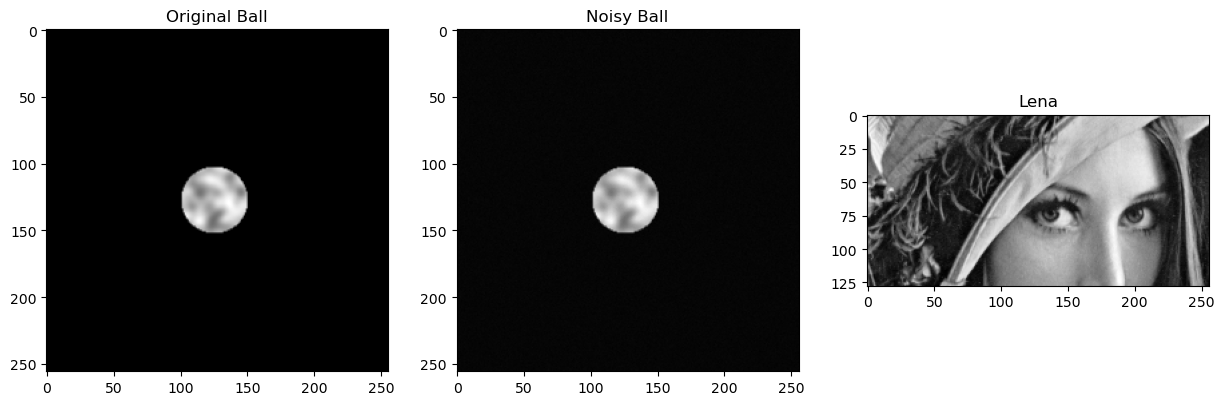

In [3]:
# Plotting the 3 images in a 1x3 grid
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(im_ball, cmap='gray')
plt.title('Original Ball')
plt.subplot(1,3,2)
plt.imshow(im_ball_noise, cmap='gray')
plt.title('Noisy Ball')
plt.subplot(1,3,3)
plt.imshow(im_lena, cmap='gray')
plt.title('Lena')
plt.show()


In the following, we apply a translation to the image. To do that, use the applyAffineMotion function which is already pre-implemented.

In [4]:
def fracMc(ref,mvf,outofbound=20):
    
    [rows, cols] = np.shape(ref);
    
    mc_c, mc_r = np.meshgrid(np.arange(cols),np.arange(rows)) # Initial coordinates, used to infer the new coordinates
    
    mc_r_tmp = mc_r + mvf[:,:,0] # Row coordinates, after the movement
    mc_c_tmp = mc_c + mvf[:,:,1] # Column coordinates, after the movement
    
    extension = outofbound
    #ref = cv2.copyMakeBorder(ref, extension, extension, extension, extension, cv2.BORDER_REPLICATE)# Padded image
    ref = cv2.copyMakeBorder(ref, extension, extension, extension, extension, cv2.BORDER_REFLECT)# Padded image
    
    mc_r = mc_r_tmp + extension # Row coordinates, after the movement, in which we want to do the interpolation (in the padded image)
    mc_c = mc_c_tmp + extension # Column coordinates, after the movement, in which we want to do the interpolation (in the padded image)
    
    colMeshGrid, rowMeshGrid = np.meshgrid(np.arange(cols+2*extension),np.arange(rows+2*extension)) # Original coordinates, at which we know the data points
    
    
    # Put the input coordinates into the form of an array, to mach scipy format
    points = np.zeros((np.shape(ref)[0]*np.shape(ref)[1],2))
    points[:,0] = colMeshGrid.reshape(np.shape(ref)[0]*np.shape(ref)[1])
    points[:,1] = rowMeshGrid.reshape(np.shape(ref)[0]*np.shape(ref)[1])
    
    values = ref.reshape(np.shape(ref)[0]*np.shape(ref)[1])    
    
    
    # Put the coordinates in which we want ot do the interpolation into the form of an array, to mach scipy format
    points_inter = np.zeros((rows*cols,2))
    points_inter[:,0] = mc_c.reshape(rows*cols)
    points_inter[:,1] = mc_r.reshape(rows*cols)
    
    motcomp =  griddata(points, values, points_inter,'linear')
    
    motcomp = motcomp.reshape(rows,cols)

    return motcomp


def applyAffineMotion(x,b,B = np.zeros((2,2)),out = 100):
    N, M = np.shape(x)
    px, py = np.meshgrid(np.arange(-(M-1)/2,(M-1)/2+1), np.arange(-(N-1)/2,(N-1)/2+1))
    
    mvfx = b[0] + B[0,0]*px + B[0,1]*py
    mvfy = b[1] + B[1,0]*px + B[1,1]*py
    
    mvf = np.zeros((np.shape(mvfx)[0],np.shape(mvfx)[1],2))
    mvf[:,:,1] = mvfx
    mvf[:,:,0] = mvfy
    
    y = fracMc(x,mvf,out)
    return y

In [5]:
# Implementing the displacement
horiz_displacement = 10.
vert_displacement  = 1.
b = np.array([ horiz_displacement, vert_displacement])

# We could also use an affine motion matrix
# B = np.zeros((2,2))

im_ball2 = applyAffineMotion(im_ball,b)
im_ball_noise2 = applyAffineMotion(im_ball_noise,b)
im_lena2 = applyAffineMotion(im_lena,b)

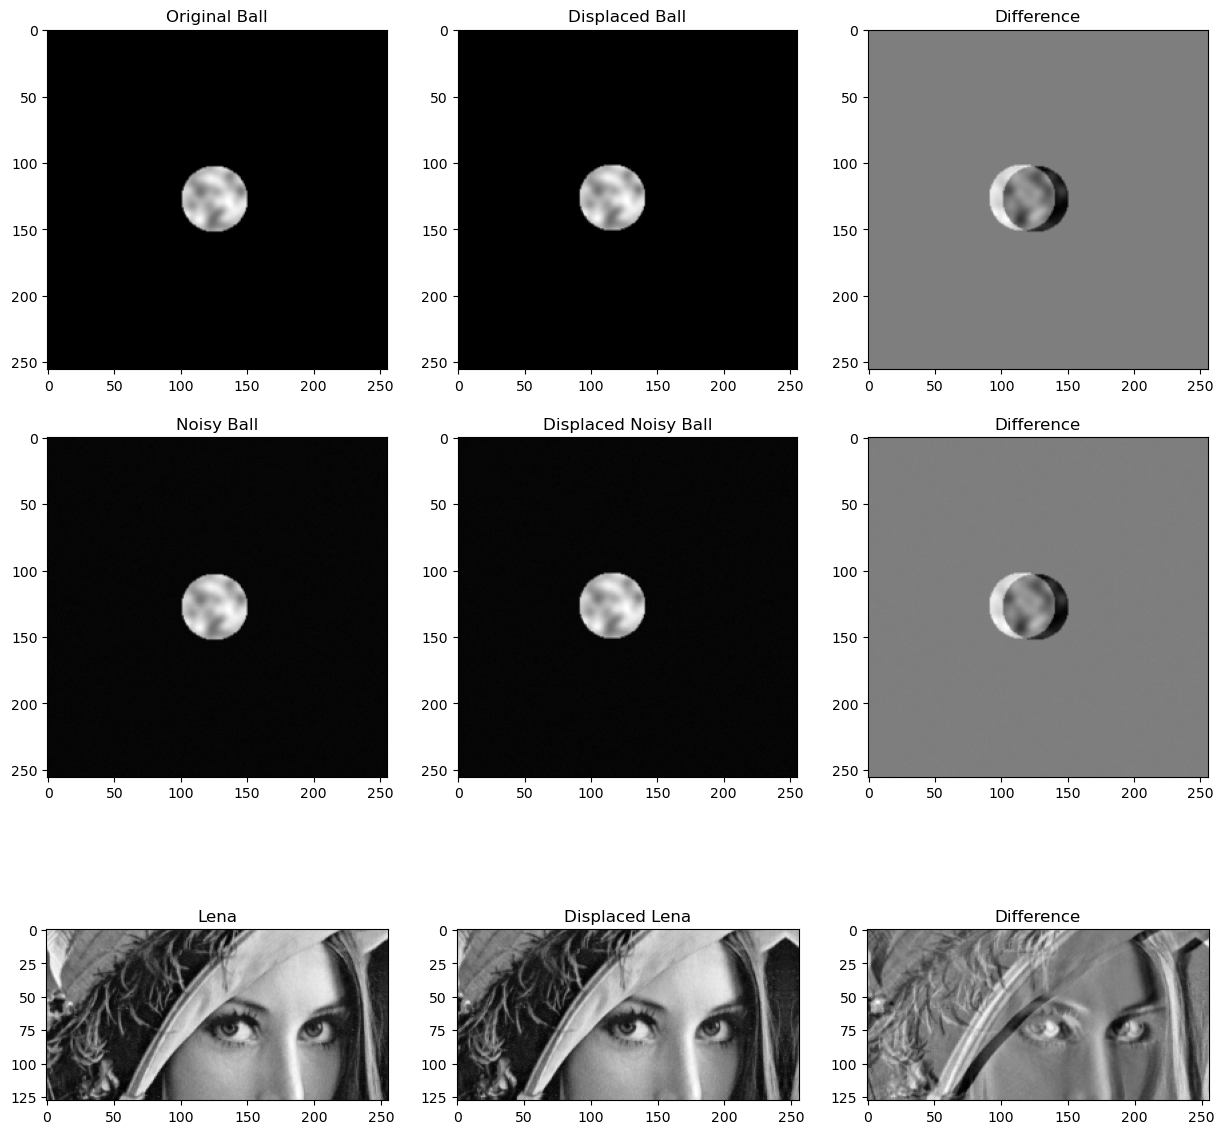

In [6]:
# Plotting the comparison between the original and the displaced images in a 3x3 grid
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
plt.imshow(im_ball, cmap='gray')
plt.title('Original Ball')
plt.subplot(3,3,2)
plt.imshow(im_ball2, cmap='gray')
plt.title('Displaced Ball')
plt.subplot(3,3,3)
plt.imshow(im_ball2-im_ball, cmap='gray')
plt.title('Difference')

plt.subplot(3,3,4)
plt.imshow(im_ball_noise, cmap='gray')
plt.title('Noisy Ball')
plt.subplot(3,3,5)
plt.imshow(im_ball_noise2, cmap='gray')
plt.title('Displaced Noisy Ball')
plt.subplot(3,3,6)
plt.imshow(im_ball_noise2-im_ball_noise, cmap='gray')
plt.title('Difference')

plt.subplot(3,3,7)
plt.imshow(im_lena, cmap='gray')
plt.title('Lena')
plt.subplot(3,3,8)
plt.imshow(im_lena2, cmap='gray')
plt.title('Displaced Lena')
plt.subplot(3,3,9)
plt.imshow(im_lena2-im_lena, cmap='gray')
plt.title('Difference')
plt.show()


Compute the FFT of the two images. Using the indications given in the theroretical part, describe a method with which you can find the parameters of the translation from the two FFTs.

**Answer:**

In [7]:
# Computing the FFT of the images
IM_ball = np.fft.fft2(im_ball)
IM_ball_noise = np.fft.fft2(im_ball_noise)
IM_lena = np.fft.fft2(im_lena)

# Computing the FFT of the displaced images
IM_ball2 = np.fft.fft2(im_ball2)
IM_ball_noise2 = np.fft.fft2(im_ball_noise2)
IM_lena2 = np.fft.fft2(im_lena2)

Compute the phase of the Fourier transform.

In [8]:
def angle2D(x):
    a = np.angle(x)
    
    b1 = np.unwrap(a,axis=0)
    b2 = np.unwrap(b1,axis=1)
    b3 = np.unwrap(a,axis=0)[:,::-1]
    b4 = np.unwrap(b3,axis=1)[:,::-1]
    
    y = (b2+b4)/2./(-2.*np.pi)
    return y

In [9]:
# Commputing the phase of the ratio for each pair of images
phi_ball = angle2D(IM_ball2/IM_ball)
phi_ball_noise = angle2D(IM_ball_noise2/IM_ball_noise)
phi_lena = angle2D(IM_lena2/IM_lena)

Display phi. Is it a linear plane and why?

**Answer:**

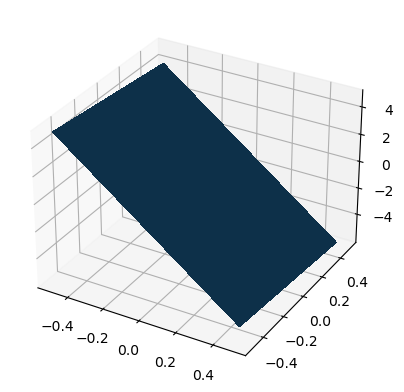

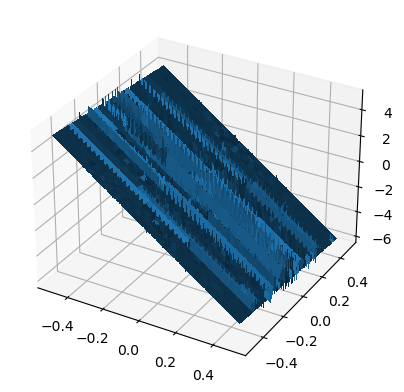

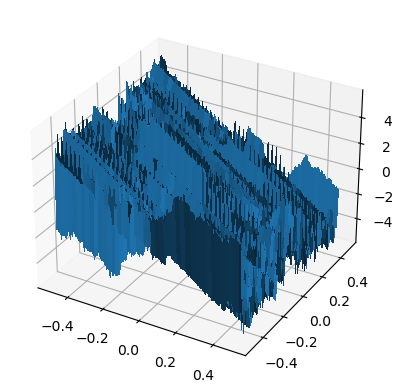

In [10]:
fx_ball, fy_ball = np.meshgrid(np.arange(-(M_ball-1)/2,(M_ball-1)/2+1)/M_ball, 
                     np.arange(-(N_ball-1)/2,(N_ball-1)/2+1)/N_ball)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(fx_ball, fy_ball, phi_ball, linewidth=0, antialiased=False)

fx_ball, fy_ball = np.meshgrid(np.arange(-(M_ball-1)/2,(M_ball-1)/2+1)/M_ball, 
                     np.arange(-(N_ball-1)/2,(N_ball-1)/2+1)/N_ball)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(fx_ball, fy_ball, phi_ball_noise, linewidth=0, antialiased=False)

fx_lena, fy_lena = np.meshgrid(np.arange(-(M_lena-1)/2,(M_lena-1)/2+1)/M_lena, 
                     np.arange(-(N_lena-1)/2,(N_lena-1)/2+1)/N_lena)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(fx_lena, fy_lena, phi_lena, linewidth=0, antialiased=False)

Translation estimation: to estimate the parameters of the translation, we are now looking for the slope of the plane.

Method 1: estimate it using the median of the gradient. To do that, complete the gradient function.

In [11]:
def gradient(M,stepX=1.,stepY=1.):
# Computes the gradient of an image, over the rows and the column directions. StepY is the assumed gap 
# between the rows and StepX is the assumed gap between the columns

    gy = np.zeros((np.shape(M)[0],np.shape(M)[1]))
    gx = np.zeros((np.shape(M)[0],np.shape(M)[1]))

    gy[0:-1,:] = (M[1:,:]-M[0:-1,:])/stepY
    gy[-1,:] = gy[-2,:]

    gx[:,0:-1] = (M[:,1:]-M[:,0:-1])/stepX
    gx[:,-1] = gx[:,-2]
        
    return gx,gy

In [13]:
gx_ball, gy_ball = gradient(phi_ball,1/M_ball,1/N_ball)
GX_ball = np.median(gx_ball)
GY_ball = np.median(gy_ball)

gx_ball_noise, gy_ball_noise = gradient(phi_ball_noise,1/M_ball,1/N_ball)
GX_ball_noise = np.median(gx_ball_noise)
GY_ball_noise = np.median(gy_ball_noise)

gx_lena, gy_lena = gradient(phi_lena,1/M_lena,1/N_lena)
GX_lena = np.median(gx_lena)
GY_lena = np.median(gy_lena)

In [14]:
print("The estimated displacement for the ball image is: ", GX_ball, GY_ball)
print("The estimated displacement for the noisy ball image is: ", GX_ball_noise, GY_ball_noise)
print("The estimated displacement for the lena image is: ", GX_lena, GY_lena)

The estimated displacement for the ball image is:  -10.0 -1.0
The estimated displacement for the noisy ball image is:  -9.985816087279403 -0.9783405440248885
The estimated displacement for the lena image is:  -9.025588509231142 0.32987854600511923


Method 2: the code below computes the least Square planar approximation of phi, enabling you how to estimate the parameters of the translation. Explain how it works.

In [15]:
def medianFilter(x,N):
    z = copyMakeBorder(x, N, N, N, N, BORDER_REPLICATE)
    y = np.zeros(np.shape(x))
    
    for r in range(np.shape(x)[0]):
        for c in range(np.shape(x)[1]):
            tmp = z[r:r+2*N+1,c:c+2*N+1]
            y[r,c] = np.median(tmp)
    return y

In [18]:
phi_ball = phi_ball-phi_ball[int(N_ball/2+2), int(M_ball/2+2)]
t = medianFilter(phi_ball,1)
A = np.zeros((np.shape(fx_ball)[0]*np.shape(fx_ball)[1],2))
A[:,0] = fx_ball.reshape(np.shape(fx_ball)[0]*np.shape(fx_ball)[1])
A[:,1] = fy_ball.reshape(np.shape(fy_ball)[0]*np.shape(fy_ball)[1])
b = t.reshape(np.shape(t)[0]*np.shape(t)[1])
best_ball = np.dot(np.linalg.pinv(A),b)

phi_ball_noise = phi_ball_noise-phi_ball_noise[int(N_ball/2+2), int(M_ball/2+2)]
t = medianFilter(phi_ball_noise,1)
A = np.zeros((np.shape(fx_ball)[0]*np.shape(fx_ball)[1],2))
A[:,0] = fx_ball.reshape(np.shape(fx_ball)[0]*np.shape(fx_ball)[1])
A[:,1] = fy_ball.reshape(np.shape(fy_ball)[0]*np.shape(fy_ball)[1])
b = t.reshape(np.shape(t)[0]*np.shape(t)[1])
best_ball_noise = np.dot(np.linalg.pinv(A),b)

phi_lena = phi_lena-phi_lena[int(N_lena/2+2), int(M_lena/2+2)]
t = medianFilter(phi_lena,1)
A = np.zeros((np.shape(fx_lena)[0]*np.shape(fx_lena)[1],2))
A[:,0] = fx_lena.reshape(np.shape(fx_lena)[0]*np.shape(fx_lena)[1])
A[:,1] = fy_lena.reshape(np.shape(fy_lena)[0]*np.shape(fy_lena)[1])
b = t.reshape(np.shape(t)[0]*np.shape(t)[1])
best_lena = np.dot(np.linalg.pinv(A),b)

In [19]:
print("The estimated displacement for the ball image is: ", best_ball)
print("The estimated displacement for the noisy ball image is: ", best_ball_noise)
print("The estimated displacement for the lena image is: ", best_lena)

The estimated displacement for the ball image is:  [-9.99981832 -0.99999929]
The estimated displacement for the noisy ball image is:  [-9.83375305 -1.00601339]
The estimated displacement for the lena image is:  [-7.90761829 -0.01702052]


**Relaunch the above code**:
- with and without noise
- with the lena image, instead of the ball image.

Each time, are you able to correctly estimate the translation? Why? Comment your results.

# II-Indirect parametric estimation
In this last part, we will perform indirect parametric estimation. The movement vector field will be estimated by 1) block matching; 2) optic flow. **You have to reuse here the functions that you implemented during the first practical work**. Each time, you will then estimate the translation by taking the median of the estimated vector field.

Perform the experiment without and with noise (you can then take sigma = 2).

Finally, compare all the parametric estimation methods when the translation values are not integer.

In [21]:
#%%
def initVector(ref,cur):
    """
    Performs an initialization for the first regularizers

    Parameters
    ----------
    ref : np.array
        Reference image.
    cur : np.array
        Reference image.

    Returns
    -------
    pV : np.array (vector of size 2)
        Regularizer for displacement.

    """
    
    
    step = 8
    cont = 4*step
    
    REF = gaussian_filter(ref,1.) # Unclear how to set sigma
    CUR = gaussian_filter(cur,1.)
    
    CUR = CUR[cont+1:(np.shape(CUR)[0]-cont):step,cont+1:(np.shape(CUR)[1]-cont):step]
    SSDMIN = np.inf
    
    pV=np.zeros(2)
    
    for globR in range(-cont,cont):
        for globC in range(-cont,cont):
            RR = REF[cont+1-globR:(cont-globR+np.shape(CUR)[0]*step):step, cont+1-globC:(cont-globC+np.shape(CUR)[1]*step):step]
            SSD = np.sum((RR.astype(float) - CUR.astype(float))**2)
            
            if SSD<SSDMIN:
                SSDMIN=SSD
                pV[0]=globR
                pV[1]=globC
                
                
    return pV

In [22]:
def computePredictor(r,c,brow,bcol,mvf,ref,cur):
    """
    compute predictor gives the median of the mvf of the blocks :
        - to the left of the current block
        - above the current block
        - upper left of the current block
        
    If such blocks do not exist due to the border effects, they are not taken into account.

    Parameters
    ----------
    See usage in the me_ssd function

    Returns
    -------
    pV : Median of the mvf of the neighboor blocks

    """
    if r < brow and c < bcol:
        pV = initVector(ref,cur)
        
    elif r < brow: # First row
        pV = mvf[r,c-bcol,:]
        
    elif c < bcol: # First column
        pV = mvf[r-brow,c,:]
        
    else: # Inside
        if c >= np.shape(mvf)[1]-bcol: # Last column
            vC = mvf[r-brow,c-bcol,:]
        
        else: # Not the last column
            vC = mvf[r-brow,c+bcol,:]
            
        vA = mvf[r,c-bcol,:]
        vB = mvf[r-brow,c,:]

        temp = np.array([vA, vB, vC]).T

        pV = np.median(temp,axis = 1)
        
    pV = pV.ravel()
    
    return pV

In [29]:
def me_ssd(cur, ref, brow, bcol, search, lamb=0):
    """
    ME BMA full search Motion estimation
    mvf, prediction = me_ssd(cur, ref, brow, bcol, search);

    A regularization constraint can be used
    mvf = me(cur, ref, brow, bcol, search, lambda);
    In this case the function minimize SAD(v)+lambda*error(v)
    where error(v) is the difference between the candidate vector v and the
    median of its available neighbors.
 
    Code inspired from the one of Marco Cagnazzo

    Parameters
    ----------
    cur : numpy array
        Current (i.e. second) frame of the video.
    ref : numpy array
        Previous (i.e. first) frame of the video.
    brow : int
        Number of rows in each block.
    bcol : int
        Number of rows in each block.
    search : int
        Search radius
    lamb : double
        Regularization parameter

    Returns
    -------
    mvf : numpy array
        Motion vector field, containing the displacement vectors for each block.
    prediction : numpy array
        The predicted current frame based on the motion estimation.
    """
    
    extension = search
    ref_extended = cv2.copyMakeBorder(ref, extension, extension, extension, extension, cv2.BORDER_REPLICATE)
    
    prediction = np.zeros(np.shape(cur))
    lamb *= brow * bcol
    mvf = np.zeros((np.shape(cur)[0],np.shape(cur)[1],2))
    
    # Non-regularized search
    if lamb == 0.:
        for r in range(0, cur.shape[0], brow):
            for c in range(0, cur.shape[1], bcol):
                B = cur[r:r+brow, c:c+bcol]
                costMin = float('inf')
                Rbest = None
                
                for dcol in range(-search, search + 1):
                    for drow in range(-search, search + 1):
                        R = ref_extended[r+drow+extension:r+drow+brow+extension, c+dcol+extension:c+dcol+bcol+extension]
                        cost = np.sum((B - R) ** 2)
                        
                        if cost < costMin:
                            costMin = cost
                            Rbest = R
                            best_drow, best_dcol = drow, dcol
                
                mvf[r:r+brow, c:c+bcol, 0] = best_drow
                mvf[r:r+brow, c:c+bcol, 1] = best_dcol
                prediction[r:r+brow, c:c+bcol] = Rbest
                
    else: # Regularized search
        for r in range(0, cur.shape[0], brow):
            for c in range(0, cur.shape[1], bcol):
                B = cur[r:r+brow, c:c+bcol]
                costMin = float('inf')
                Rbest = None
                pV = computePredictor(r, c, brow, bcol, mvf, ref, cur)
                
                for dcol in range(-search, search + 1):
                    for drow in range(-search, search + 1):
                        R = ref_extended[r+drow+extension:r+drow+brow+extension, c+dcol+extension:c+dcol+bcol+extension]
                        ssd_cost = np.sum((B - R) ** 2)
                        reg_cost = lamb * np.sum((pV - np.array([drow, dcol])) ** 2)
                        total_cost = ssd_cost + reg_cost

                        if total_cost < costMin:
                            costMin = total_cost
                            Rbest = R
                            best_drow, best_dcol = drow, dcol

                mvf[r:r+brow, c:c+bcol, 0] = best_drow
                mvf[r:r+brow, c:c+bcol, 1] = best_dcol
                prediction[r:r+brow, c:c+bcol] = Rbest
                
    # mvf = -mvf # For compatibility with standards
                            
    return mvf, prediction

In [62]:
def displayMVF(I, mvf, subsamp):
    
    row, col = np.shape(I)

    # Subsample dense MVF 
    vectRow = mvf[0:row:subsamp, 0:col:subsamp,0]
    vectCol = mvf[0:row:subsamp ,0:col:subsamp,1]

    # Printing vectrow and vectcol
    # print(vectRow)
    # print('')
    # print(vectCol)
    
    # Determine vector origins
    X , Y = np.meshgrid(np.arange(0, col, subsamp), np.arange(0, row, subsamp))
    X = X + np.floor(subsamp/2.)
    Y = Y + np.floor(subsamp/2.)
    
    # Printing X and Y
    # print('')
    # print(X)
    # print('')
    # print(Y)

    # Show image
    plt.figure()
    plt.imshow(I,cmap='gray')
    plt.quiver(X, Y, vectCol,-vectRow)
    
    return

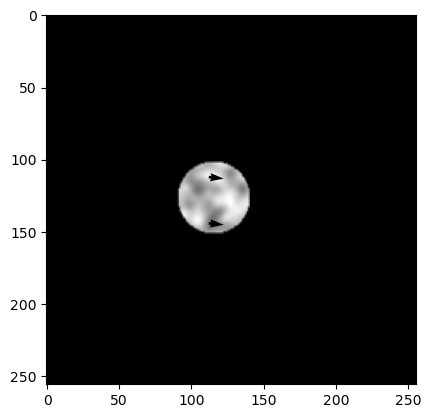

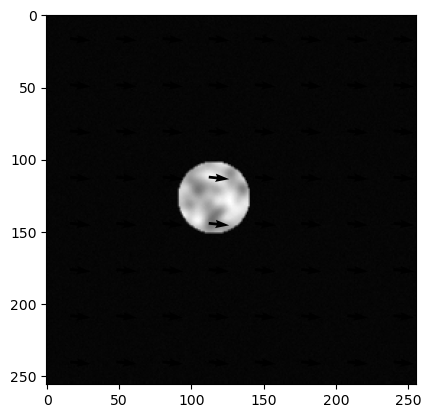

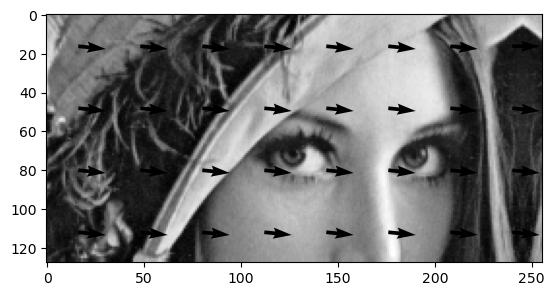

In [64]:
lamb = 0
mvf_ball, prediction_ball = me_ssd(im_ball2, im_ball, 32, 32, 10, lamb)
mvf_ball_noise, prediction_ball_noise = me_ssd(im_ball_noise2, im_ball_noise, 32, 32, 10, lamb)
mvf_lena, prediction_lena = me_ssd(im_lena2, im_lena, 32, 32, 10, lamb)

# Display the motion vector field
displayMVF(im_ball2, mvf_ball, 32)
displayMVF(im_ball_noise2, mvf_ball_noise, 32)
displayMVF(im_lena2, mvf_lena, 32)

In [65]:
mvf_x_ball = mvf_ball[:,:,1]
mvf_y_ball = mvf_ball[:,:,0]
bx_ball = np.median(mvf_x_ball)
by_ball = np.median(mvf_y_ball)

mvf_x_ball_noise = mvf_ball_noise[:,:,1]
mvf_y_ball_noise = mvf_ball_noise[:,:,0]
bx_ball_noise = np.median(mvf_x_ball_noise)
by_ball_noise = np.median(mvf_y_ball_noise)

mvf_x_lena = mvf_lena[:,:,1]
mvf_y_lena = mvf_lena[:,:,0]
bx_lena = np.median(mvf_x_lena)
by_lena = np.median(mvf_y_lena)

print("The estimated displacement for the ball image is: ", bx_ball, by_ball)
print("The estimated displacement for the noisy ball image is: ", bx_ball_noise, by_ball_noise)
print("The estimated displacement for the lena image is: ", bx_lena, by_lena)

The estimated displacement for the ball image is:  -10.0 -10.0
The estimated displacement for the noisy ball image is:  10.0 1.0
The estimated displacement for the lena image is:  10.0 1.0


Estimation with optic flow

In [69]:
def computeDerivatives(im1, im2):
    kernel1D = np.expand_dims((1./12.)*np.array([-1., 8., 0., -8., 1.]),axis=1).T
    fx = convolve2d(im1,kernel1D,'same')
    fy = convolve2d(im1,kernel1D.T,'same')
    ft = convolve2d(im1, 0.25*np.ones((2,2)),'same') + convolve2d(im2, -0.25*np.ones((2,2)),'same')
    fx = -fx
    fy = -fy

    return fx, fy, ft

In [67]:
#%%
def HS(im1, im2, uInitial, vInitial, alpha=1, ite=100,blur = 1.):
    """
    Horn-Schunck optical flow method.
    Horn, B.K.P., and Schunck, B.G., Determining Optical Flow, AI(17), No. 1-3, August 1981, pp. 185-203 http://dspace.mit.edu/handle/1721.1/6337
    
    [u, v] = HS(im1, im2, alpha, ite, uInitial, vInitial, displayFlow)
    
    Parameters
    ----------
    im1, im2 : np.array
        Two subsequent frames or images.
    uInitial, vInitial: np.array
        Initial values for the (u,v) flow. If well initialized, the flow would converge faster and hence would need less iterations.
    alpha : scalar
        A parameter that reflects the influence of the smoothness term.
    ite : int
        Number of iterations.

    Returns
    -------
    u,v : np.array
        Optical flow.
    """
    
    im1 = gaussian_filter(im1,blur)
    im2 = gaussian_filter(im2,blur)
    
    # Set initial value for the flow vectors
    u = uInitial.copy()
    v = vInitial.copy()
    
    # Estimate spatiotemporal derivatives
    fx, fy, ft = computeDerivatives(im1, im2)
    
    # Averaging kernel
    kernel_1=np.array([[1./12., 1./6., 1./12.],[1./6., 0., 1./6.],[1./12., 1./6., 1./12.]])
    
    for i in range(ite):
        # Compute local averages of the flow vectors using kernel_1
        uAvg = convolve2d(u,kernel_1,'same')
        vAvg = convolve2d(v,kernel_1,'same')
        
        # Compute flow vectors constrained by its local average and the optical flow constraints
        u = uAvg - (fx*(fx*uAvg + fy*vAvg + ft))/(alpha**2 + fx**2 + fy**2)
        v = vAvg - (fy*(fx*uAvg + fy*vAvg + ft))/(alpha**2 + fx**2 + fy**2)
        
    u[np.isnan(u)]= 0
    v[np.isnan(v)]= 0
    
    return u, v

The estimated displacement for the ball image is:  -9.89952666105513 -9.725003569069122
The estimated displacement for the noisy ball image is:  9.990363731804123 0.9988802968917696
The estimated displacement for the lena image is:  4.588613440248148 0.35497276056333105


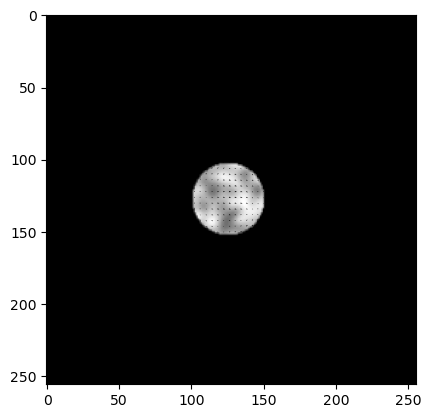

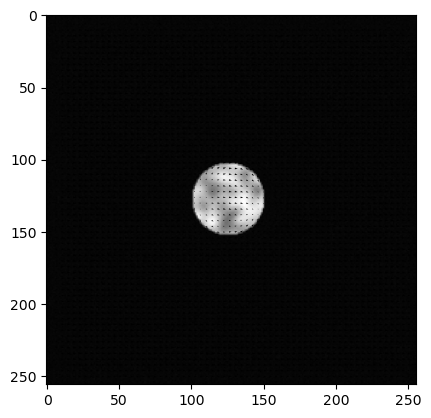

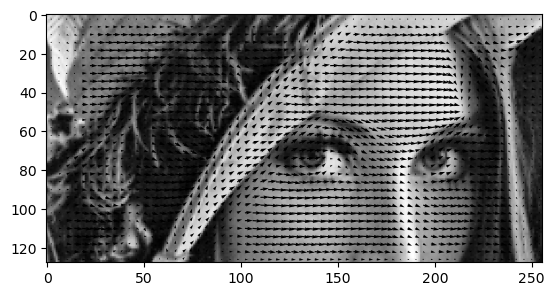

In [72]:
alpha = 100
ite = 100
uInitial_ball = mvf_ball[:,:,1]
vInitial_ball = mvf_ball[:,:,0]

u_ball, v_ball = HS(im_ball, im_ball2, uInitial_ball, vInitial_ball, alpha, ite)
mvf_hs_ball = np.zeros((np.shape(v_ball)[0],np.shape(v_ball)[1],2))
mvf_hs_ball[:,:,0] = v_ball
mvf_hs_ball[:,:,1] = u_ball

displayMVF(im_ball,mvf_hs_ball,4)

bx_ball = np.median(u_ball)
by_ball = np.median(v_ball)

uInitial_ball_noise = mvf_ball_noise[:,:,1]
vInitial_ball_noise = mvf_ball_noise[:,:,0]

u_ball_noise, v_ball_noise = HS(im_ball_noise, im_ball_noise2, uInitial_ball_noise, vInitial_ball_noise, alpha, ite)
mvf_hs_ball_noise = np.zeros((np.shape(v_ball_noise)[0],np.shape(v_ball_noise)[1],2))
mvf_hs_ball_noise[:,:,0] = v_ball_noise
mvf_hs_ball_noise[:,:,1] = u_ball_noise

displayMVF(im_ball_noise,mvf_hs_ball_noise,4)

bx_ball_noise = np.median(u_ball_noise)
by_ball_noise = np.median(v_ball_noise)

uInitial_lena = mvf_lena[:,:,1]
vInitial_lena = mvf_lena[:,:,0]

u_lena, v_lena = HS(im_lena, im_lena2, uInitial_lena, vInitial_lena, alpha, ite)
mvf_hs_lena = np.zeros((np.shape(v_lena)[0],np.shape(v_lena)[1],2))
mvf_hs_lena[:,:,0] = v_lena
mvf_hs_lena[:,:,1] = u_lena

displayMVF(im_lena,mvf_hs_lena,4)

bx_lena = np.median(u_lena)
by_lena = np.median(v_lena)

print("The estimated displacement for the ball image is: ", bx_ball, by_ball)
print("The estimated displacement for the noisy ball image is: ", bx_ball_noise, by_ball_noise)
print("The estimated displacement for the lena image is: ", bx_lena, by_lena)